## Table of Contents
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Scatterplot analysis
#### 4. Hypothesis
#### 5. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# to create graphs within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
path = '/Users/lianabulte/Career Foundry/2023 Boat Sales Analysis'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_boat_data_v4.csv'))

### 2. Data cleaning

In [6]:
df.shape

(8394, 16)

In [7]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Year Built,Length,Width,Material,Views from last 7 days,Orig Currency,Orig Price,Country,City,Price in Euros,Boat Class,Boat Status,Boat Fuel Type
0,0,0,Rigiflex power boats,2017,4.00,1.90,Not Disclosed,226,CHF,3337,Switzerland,Lake Geneva,3403.74,Motor Yacht,new boat from stock,Not Disclosed
1,1,1,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,EUR,3490,Germany,Bnningstedt,3490.00,Center console boat,new boat from stock,Not Disclosed
2,2,2,Pioner power boats,2020,3.00,1.00,Not Disclosed,64,DKK,25900,Denmark,Svendborg,3367.00,Sport Boat,new boat from stock,Not Disclosed
3,3,3,Linder power boats,2019,3.55,1.46,Aluminium,58,EUR,3399,Germany,Bayern,3399.00,Fishing Boat,new boat from stock,Not Disclosed
4,4,4,Not Disclosed,1999,6.20,2.38,Aluminium,474,CHF,3600,Switzerland,Neuenburgersee,3672.00,Catamaran,Used boat,Unleaded
5,5,5,Crescent power boats,2019,3.64,1.37,Not Disclosed,45,EUR,3333,Germany,Bayern,3333.00,Fishing Boat,new boat from stock,Not Disclosed
6,6,6,Whaly power boats,2018,4.35,1.73,Not Disclosed,180,EUR,3300,Italy,Dormelletto,3300.00,Pontoon Boat,new boat from stock,Not Disclosed
7,7,7,Terhi power boats,1987,4.35,1.75,GRP,239,CHF,3500,Switzerland,Seengen,3570.00,Fishing Boat,Used boat,Electric
8,8,8,GS Nautica power boats,2004,4.70,2.00,GRP,69,EUR,3500,Italy,Lake Garda,3500.00,Sport Boat,Used boat,Not Disclosed
9,9,9,Kimple power boats,2020,4.40,1.65,Aluminium,113,CHF,4600,Switzerland,Zugersee,4692.00,Runabout,new boat from stock,Not Disclosed


In [8]:
#check for missing values
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
Manufacturer              0
Year Built                0
Length                    0
Width                     0
Material                  0
Views from last 7 days    0
Orig Currency             0
Orig Price                0
Country                   0
City                      0
Price in Euros            0
Boat Class                0
Boat Status               0
Boat Fuel Type            0
dtype: int64

In [9]:
#check for duplicates
dups = df.duplicated()

In [10]:
dups.shape

(8394,)

/Users/lianabulte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price in Euros', ylabel='Density'>

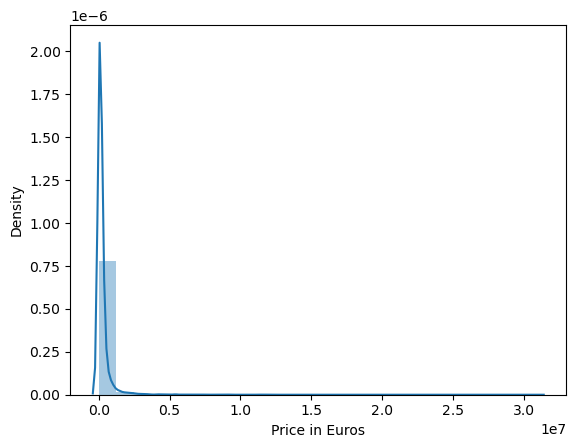

In [11]:
#checking for extreme values
sns.distplot(df['Price in Euros'], bins=25)

##### Checking the mean, median, and max of prices

In [12]:
df['Price in Euros'].mean() 

263201.30591851345

In [14]:
df['Price in Euros'].median()

89000.0

In [15]:
df['Price in Euros'].max()

31000000.0

There is a potential that the very few expensive boats will skew the results of this regression analysis

/Users/lianabulte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Views from last 7 days', ylabel='Density'>

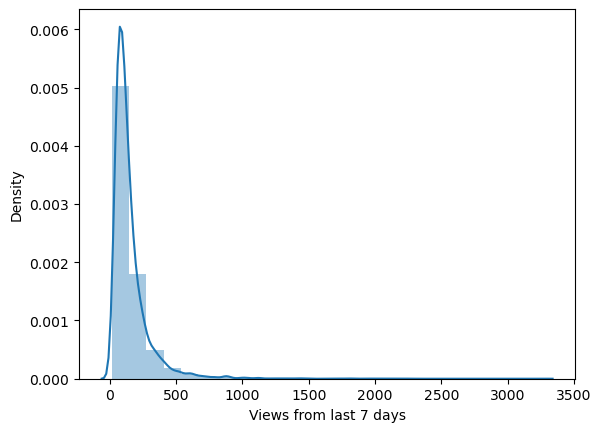

In [16]:
#checking for extreme values
sns.distplot(df['Views from last 7 days'], bins=25)

##### Checking the mean, median, and max of views

In [17]:
df['Views from last 7 days'].mean()

152.97772218251131

In [18]:
df['Views from last 7 days'].median()

110.0

In [19]:
df['Views from last 7 days'].max()

3263

The possibility of a boat being viewed 3263 does seem a bit high as that would translate into an average daily view of 466 , but i will leave this in for now as i have included the highest priced boat as well

### 3. Scatterplot analysis 

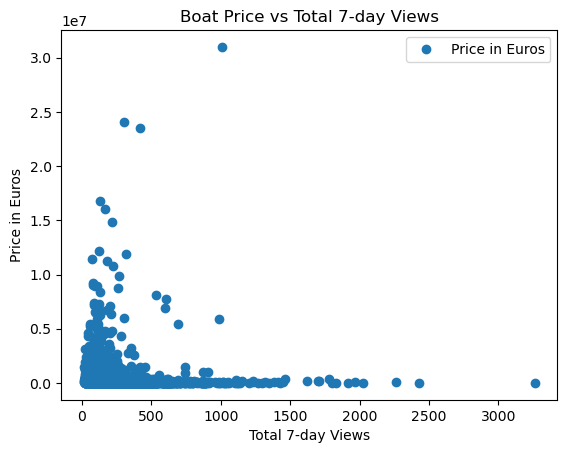

In [20]:
# Creating a scatterplot of price in euros vs. total views in the last 7 days

df.plot(x = 'Views from last 7 days', y='Price in Euros',style='o')
plt.title('Boat Price vs Total 7-day Views')  
plt.xlabel('Total 7-day Views')  
plt.ylabel('Price in Euros')  
plt.show()

### 4. Hypothesis

Testing Hypothesis : The views on a boat's ad will decrease as the price of the boat increases (negative correlation)

### 5. Regression Analysis

In [21]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.
X = df['Views from last 7 days'].values.reshape(-1,1)
y = df['Price in Euros'].values.reshape(-1,1)

In [22]:
X

array([[226],
       [ 75],
       [ 64],
       ...,
       [354],
       [266],
       [194]])

In [23]:
y

array([[3403.74],
       [3490.  ],
       [3367.  ],
       ...,
       [4499.  ],
       [4300.  ],
       [3855.6 ]])

In [24]:
# Splitting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
# Creating a regression object
regression = LinearRegression()

In [26]:
# Fitting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

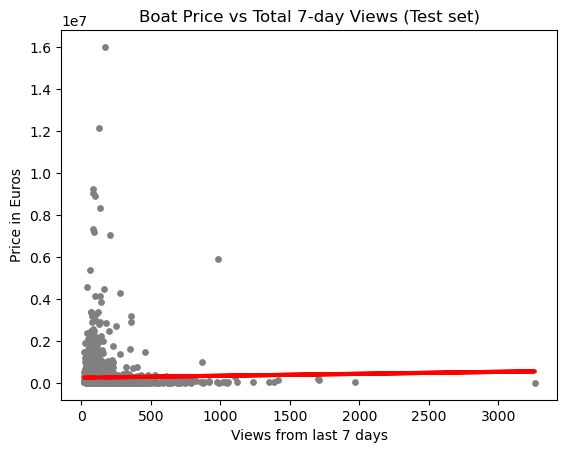

In [28]:
# Creating a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Boat Price vs Total 7-day Views (Test set)')
plot_test.xlabel('Views from last 7 days')
plot_test.ylabel('Price in Euros')
plot_test.show()

The plot reinforces my intital thoughts in exercise 6.2 that there is not a strong correlation between the two variables

In [29]:
# Creating objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [30]:
# Printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[93.43177961]]
Mean squared error:  534620200941.5712
R2 score:  -0.0025477861851912476


In [32]:
# Creating a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(15)

,Actual,Predicted
0,360000.0,258809.665020
1,1950000.0,256473.870529
2,35900.0,256660.734089
3,60000.0,261706.050188
4,85000.0,273571.886199
5,75000.0,257221.324766
6,88000.0,260117.709934
7,373350.0,264509.003576
8,165000.0,263014.095102
9,700600.0,254605.234937


#### Thoughts on how well the model performed on the test set 

The RMSE is extremely large which indicates that is very inaccurate as shows in the amount of boats with views from 0 to 500. Also the R2 score sitting at practically 0 also confirms that it is a very poor fit. Finally, by doing a quick manual scan of the Y values for actuals and predicted it further confirms that these numbers are very far apart.

This regression model disproves my hypothesis as there is no substantial correlation between the total views of an ad to the price of the boat